In [1]:
#Import Required Packages
import pandas as pd
import numpy as np
import dask.dataframe as dd
from tensorflow.keras import datasets            
from sklearn.metrics import confusion_matrix      
import matplotlib.pyplot as plt                   
import numpy as np                               
import seaborn as sns; sns.set()                  
from sklearn.metrics import classification_report 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import layers               
from tensorflow.keras import Sequential           
from keras.callbacks import ModelCheckpoint       
from sklearn.naive_bayes import GaussianNB 

Using TensorFlow backend.


In [2]:
#Read in Fashion Data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
label_name = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
#Normalize Fashion Data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

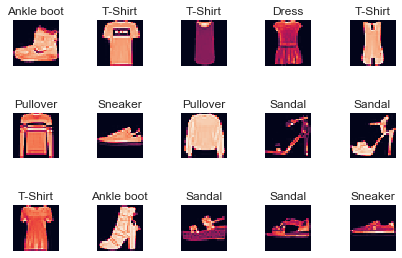

In [4]:
#Look at the images
fig, ax = plt.subplots(3,5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
  axi.imshow(x_train[i])
  axi.set_title(label_name[y_train[i]])
[axi.set_axis_off() for axi in ax.ravel()]
plt.show()

In [5]:
#Create Neural Network
##Reshape Data for Neural Network
###W=image width, H=image height
W,H = 28, 28
NN_x_train = x_train.reshape(x_train.shape[0], W, H, 1)
NN_x_test = x_test.reshape(x_test.shape[0], W, H, 1)
NN_y_train = to_categorical(y_train, 10)

In [6]:
NN=Sequential()

NN.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
NN.add(layers.MaxPooling2D(pool_size=2))
NN.add(layers.Dropout(0.3))
NN.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
NN.add(layers.MaxPooling2D(pool_size=2))
NN.add(layers.Dropout(0.3))
NN.add(layers.Flatten())
NN.add(layers.Dense(256, activation='relu'))
NN.add(layers.Dropout(0.5))
NN.add(layers.Dense(10, activation='softmax'))
NN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
%time NN.fit(NN_x_train, NN_y_train, batch_size=64, epochs=10, callbacks=[checkpointer])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.6009 - accuracy: 0.7762
Epoch 2/10
  128/60000 [..............................] - ETA: 1:20 - loss: 0.4046 - accuracy: 0.8281

C:\Users\herre\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


60000/60000 [==============================] - 77s 1ms/sample - loss: 0.4249 - accuracy: 0.8454
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.3805 - accuracy: 0.8620
Epoch 4/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3501 - accuracy: 0.8728
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.3286 - accuracy: 0.8798s - loss: 0
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.3105 - accuracy: 0.8864
Epoch 7/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.2996 - accuracy: 0.8888
Epoch 8/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.2908 - accuracy: 0.8930
Epoch 9/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2791 - accuracy: 0.8974
Epoch 10/10
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.2715 - accuracy: 0.8997
Wall time: 13min 9s


In [7]:
#Use Neural Network on Test Data
NN_Predict=NN.predict(NN_x_test)
NN_y_fit=np.full((10000,), 0, dtype='uint8')

for i in range(0, len(NN_Predict)-1,1):
    NN_y_fit[i] = np.argmax(NN_Predict[i])

In [8]:
print(classification_report(y_test, NN_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     T-Shirt       0.82      0.92      0.87      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.78      0.91      0.84      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.87      0.80      0.83      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.80      0.64      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



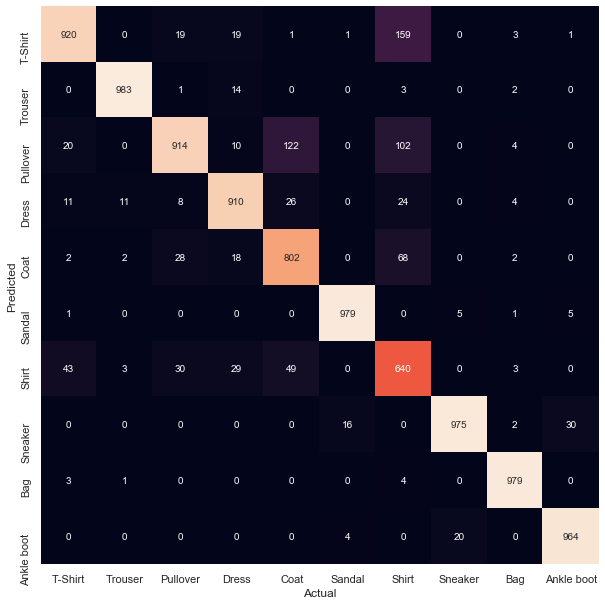

In [9]:
import matplotlib.pyplot as plt
NNConfusion=confusion_matrix(y_test, NN_y_fit)
plt.figure(figsize=(10,16))
sns.heatmap(NNConfusion.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=label_name, yticklabels=label_name)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [11]:
#Create Naive Bayes Model
##Reshape Data for NB Model
###W=image width, H=image height
W,H = 28, 28
NB_x_train = x_train.reshape(x_train.shape[0], W*H)
NB_x_test = x_test.reshape(x_test.shape[0], W*H)

NB=GaussianNB()
%time NB.fit(NB_x_train, y_train)

Wall time: 675 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
#Use NB on Test Data
NB_y_fit=NB.predict(NB_x_test)

In [13]:
print(classification_report(y_test,NB_y_fit, target_names=label_name))

              precision    recall  f1-score   support

     T-Shirt       0.81      0.59      0.68      1000
     Trouser       0.64      0.94      0.76      1000
    Pullover       0.59      0.32      0.42      1000
       Dress       0.44      0.55      0.49      1000
        Coat       0.38      0.78      0.51      1000
      Sandal       0.93      0.28      0.43      1000
       Shirt       0.32      0.04      0.07      1000
     Sneaker       0.51      0.99      0.67      1000
         Bag       0.83      0.71      0.77      1000
  Ankle boot       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



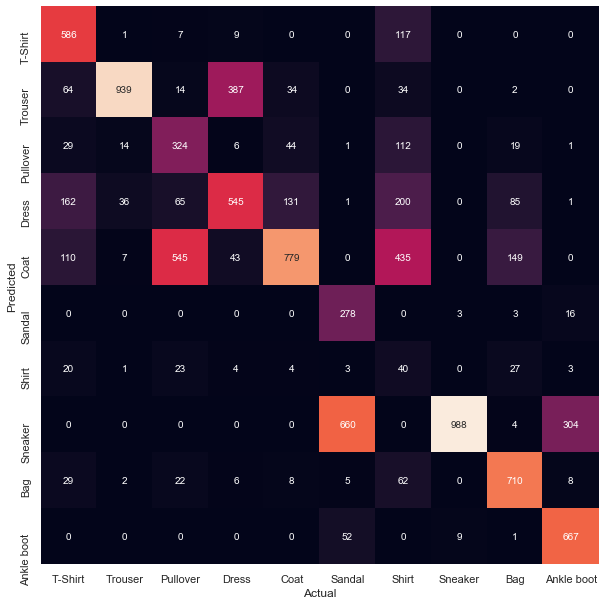

In [14]:
import matplotlib.pyplot as plt
NBConfusion=confusion_matrix(y_test, NB_y_fit)
plt.figure(figsize=(10,16))
sns.heatmap(NBConfusion.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=label_name, yticklabels=label_name)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [15]:
#Create Random Forest Model
##Reshape Data for NB Model
###W=image width, H=image height
W,H = 28, 28
RF_x_train = x_train.reshape(x_train.shape[0], W*H)
RF_x_test = x_test.reshape(x_test.shape[0], W*H)

In [16]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
%time RF.fit(RF_x_train, y_train)

C:\Users\herre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 8.12 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
#Use Random Forest on Test Data
RF_y_fit=RF.predict(RF_x_test)

In [22]:
print(classification_report(y_test,RF_y_fit,target_names=label_name))

              precision    recall  f1-score   support

     T-Shirt       0.76      0.85      0.80      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.70      0.79      0.74      1000
       Dress       0.86      0.88      0.87      1000
        Coat       0.74      0.76      0.75      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.68      0.52      0.59      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.95      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



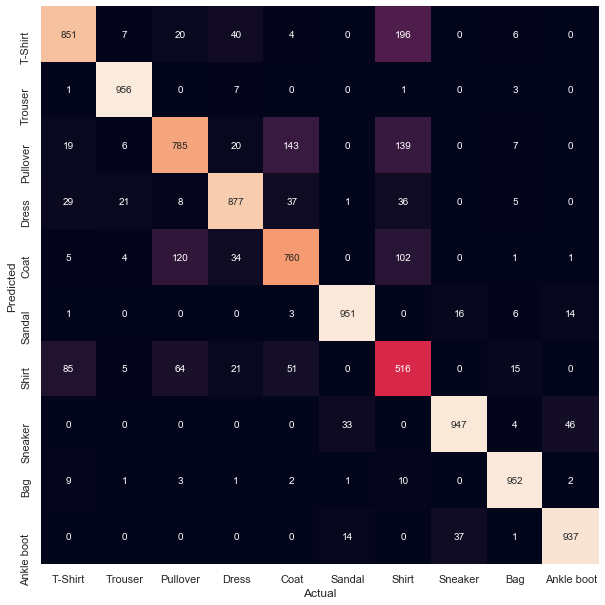

In [23]:
import matplotlib.pyplot as plt
RFConfusion=confusion_matrix(y_test, RF_y_fit)
plt.figure(figsize=(10,16))
sns.heatmap(RFConfusion.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=label_name, yticklabels=label_name)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()